In [54]:
import pandas as pd

In [55]:
df = pd.read_csv("third(400).csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,Female,36,Student,4.5,7.9,73,7,Normal,118/66,64,14497,Sleep Apnea
396,397,Female,45,Manual Labor,6.0,6.1,72,8,Obese,132/80,65,12848,Insomnia
397,398,Female,30,Student,5.3,6.5,58,10,Obese,125/76,66,15255,Insomnia
398,399,Female,41,Retired,11.0,9.1,73,9,Obese,130/75,75,6567,Sleep Apnea


In [56]:
df.drop_duplicates(inplace=True)

array([[<Axes: title={'center': 'Person ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration (hours)'}>],
       [<Axes: title={'center': 'Quality of Sleep (scale: 1-10)'}>,
        <Axes: title={'center': 'Physical Activity Level (minutes/day)'}>,
        <Axes: title={'center': 'Stress Level (scale: 1-10)'}>],
       [<Axes: title={'center': 'Heart Rate (bpm)'}>,
        <Axes: title={'center': 'Daily Steps'}>, <Axes: >]], dtype=object)

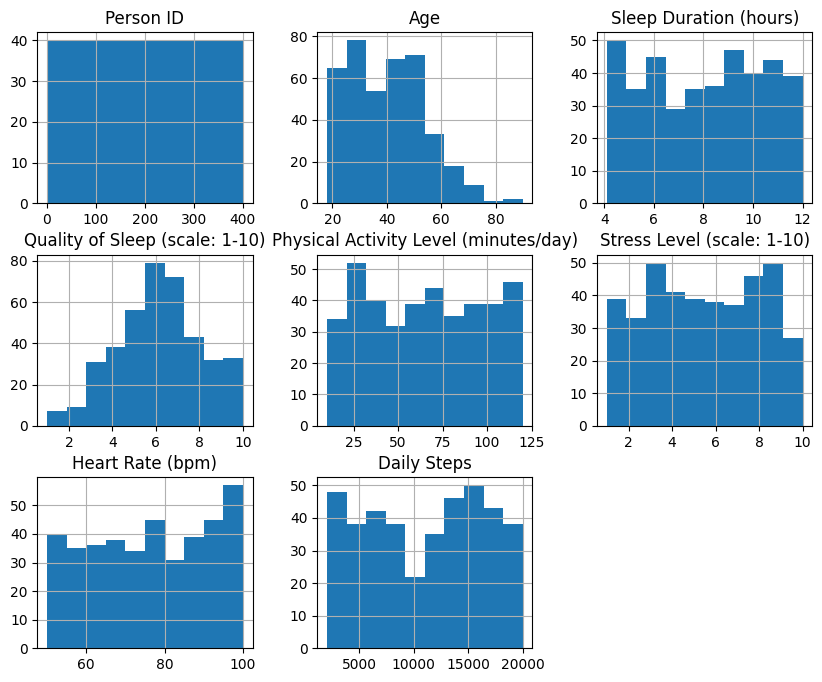

In [57]:
df.hist(figsize=(10, 8))

In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
df.isnull().sum()

Person ID                                  0
Gender                                     0
Age                                        0
Occupation                                 0
Sleep Duration (hours)                     0
Quality of Sleep (scale: 1-10)             0
Physical Activity Level (minutes/day)      0
Stress Level (scale: 1-10)                 0
BMI Category                               0
Blood Pressure (systolic/diastolic)        0
Heart Rate (bpm)                           0
Daily Steps                                0
Sleep Disorder                           290
dtype: int64

In [60]:
df = df.drop(columns=["Sleep Disorder"])

In [61]:
df.rename(columns={
    'Sleep Duration (hours)': 'Sleep Duration',
    'Quality of Sleep (scale: 1-10)': 'Quality of Sleep',
    'Physical Activity Level (minutes/day)': 'Physical Activity Level',
    'Stress Level (scale: 1-10)': 'Stress Level',
    'Blood Pressure (systolic/diastolic)': 'Blood Pressure',
    'Heart Rate (bpm)': 'Heart Rate',
}, inplace=True)


In [62]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,Female,36,Student,4.5,7.9,73,7,Normal,118/66,64,14497
396,397,Female,45,Manual Labor,6.0,6.1,72,8,Obese,132/80,65,12848
397,398,Female,30,Student,5.3,6.5,58,10,Obese,125/76,66,15255
398,399,Female,41,Retired,11.0,9.1,73,9,Obese,130/75,75,6567


In [63]:
# Change objects into categorical numbers
from sklearn import preprocessing

# Columns we want to transform
categorical = ["Gender",  "BMI Category"]

label_encoder = preprocessing.LabelEncoder()

for label in categorical:
    df[label] = label_encoder.fit_transform(df[label])

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,1,29,Manual Labor,7.4,7.0,41,7,1,124/70,91,8539
1,2,0,43,Retired,4.2,4.9,41,5,1,131/86,81,18754
2,3,1,44,Retired,6.1,6.0,107,4,3,122/70,81,2857
3,4,1,29,Office Worker,8.3,10.0,20,10,1,124/72,55,6886
4,5,1,67,Retired,9.1,9.5,19,4,2,133/78,97,14945


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                400 non-null    int64  
 1   Gender                   400 non-null    int64  
 2   Age                      400 non-null    int64  
 3   Occupation               400 non-null    object 
 4   Sleep Duration           400 non-null    float64
 5   Quality of Sleep         400 non-null    float64
 6   Physical Activity Level  400 non-null    int64  
 7   Stress Level             400 non-null    int64  
 8   BMI Category             400 non-null    int64  
 9   Blood Pressure           400 non-null    object 
 10  Heart Rate               400 non-null    int64  
 11  Daily Steps              400 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 37.6+ KB


In [65]:
# Convert "Blood Pressure" from string (e.g., "126/82") to numeric
df['Blood Pressure'] = df['Blood Pressure'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Verify the conversion
print(df[['Blood Pressure']].head())

   Blood Pressure
0        1.771429
1        1.523256
2        1.742857
3        1.722222
4        1.705128


In [66]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,1,29,Manual Labor,7.4,7.0,41,7,1,1.771429,91,8539
1,2,0,43,Retired,4.2,4.9,41,5,1,1.523256,81,18754
2,3,1,44,Retired,6.1,6.0,107,4,3,1.742857,81,2857
3,4,1,29,Office Worker,8.3,10.0,20,10,1,1.722222,55,6886
4,5,1,67,Retired,9.1,9.5,19,4,2,1.705128,97,14945
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,0,36,Student,4.5,7.9,73,7,0,1.787879,64,14497
396,397,0,45,Manual Labor,6.0,6.1,72,8,1,1.650000,65,12848
397,398,0,30,Student,5.3,6.5,58,10,1,1.644737,66,15255
398,399,0,41,Retired,11.0,9.1,73,9,1,1.733333,75,6567


In [67]:
df['Physical Activity Level'].describe()

count    400.000000
mean      64.985000
std       32.297874
min       10.000000
25%       35.000000
50%       65.500000
75%       94.000000
max      120.000000
Name: Physical Activity Level, dtype: float64

In [68]:
df['Blood Pressure'].describe()

count    400.000000
mean       1.686002
std        0.122012
min        1.413793
25%        1.599351
50%        1.680278
75%        1.787134
max        2.083333
Name: Blood Pressure, dtype: float64

In [69]:
## Normalization of Sleep Duration & Quality of Sleep & Physical Activity Level & Stress Level & Blood Pressure & Heart Rate
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df[['Physical Activity Level']] = scaler.fit_transform(df[['Physical Activity Level']])
df[['Physical Activity Level']].describe()


,Physical Activity Level
count,400.000000
mean,0.499864
std,0.293617
min,0.000000
25%,0.227273
50%,0.504545
75%,0.763636
max,1.000000


In [70]:

# Assuming 'df' is your dfFrame
numerical_columns = df.select_dtypes(include=['number']).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_info = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count number of outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        outlier_info[col] = {
            "Q1": Q1, "Q3": Q3, "IQR": IQR,
            "Lower Bound": lower_bound, "Upper Bound": upper_bound,
            "Num Outliers": len(outliers),
            "Outliers": outliers.values  # Show outlier values
        }
    
    return outlier_info

# Detect outliers in all numerical columns
outliers = detect_outliers_iqr(df, numerical_columns)

# Display results
for col, info in outliers.items():
    print(f"\n📊 Outlier Analysis for: {col}")
    print(f"Q1: {info['Q1']}, Q3: {info['Q3']}, IQR: {info['IQR']}")
    print(f"Lower Bound: {info['Lower Bound']}, Upper Bound: {info['Upper Bound']}")
    print(f"Number of Outliers: {info['Num Outliers']}")
    print(f"Outliers: {info['Outliers']}\n")



📊 Outlier Analysis for: Person ID
Q1: 100.75, Q3: 300.25, IQR: 199.5
Lower Bound: -198.5, Upper Bound: 599.5
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Gender
Q1: 0.0, Q3: 1.0, IQR: 1.0
Lower Bound: -1.5, Upper Bound: 2.5
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Age
Q1: 29.0, Q3: 49.0, IQR: 20.0
Lower Bound: -1.0, Upper Bound: 79.0
Number of Outliers: 3
Outliers: [80 90 86]


📊 Outlier Analysis for: Sleep Duration
Q1: 5.9, Q3: 10.125, IQR: 4.225
Lower Bound: -0.4374999999999991, Upper Bound: 16.4625
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Quality of Sleep
Q1: 4.7, Q3: 7.425000000000001, IQR: 2.7250000000000005
Lower Bound: 0.6124999999999998, Upper Bound: 11.512500000000001
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Physical Activity Level
Q1: 0.22727272727272727, Q3: 0.7636363636363636, IQR: 0.5363636363636363
Lower Bound: -0.5772727272727272, Upper Bound: 1.568181818181818
Number of Outliers: 0
Outliers: []

In [71]:
df.to_csv('third_clean.csv', index=False)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,1,29,Manual Labor,7.4,7.0,0.281818,7,1,1.771429,91,8539
1,2,0,43,Retired,4.2,4.9,0.281818,5,1,1.523256,81,18754
2,3,1,44,Retired,6.1,6.0,0.881818,4,3,1.742857,81,2857
3,4,1,29,Office Worker,8.3,10.0,0.090909,10,1,1.722222,55,6886
4,5,1,67,Retired,9.1,9.5,0.081818,4,2,1.705128,97,14945
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,0,36,Student,4.5,7.9,0.572727,7,0,1.787879,64,14497
396,397,0,45,Manual Labor,6.0,6.1,0.563636,8,1,1.650000,65,12848
397,398,0,30,Student,5.3,6.5,0.436364,10,1,1.644737,66,15255
398,399,0,41,Retired,11.0,9.1,0.572727,9,1,1.733333,75,6567
